Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm 
import numpy as np
import math 
import statistics as st 
from sklearn.svm import SVC  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import plotly.express as px

Dataset 

In [2]:
'''
| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of capital letters
| = total number of capital letters in the e-mail
|
| 1 nominal {0,1} class attribute of type spam
| = denotes whether the e-mail was considered spam (1) or not (0), 
| i.e. unsolicited commercial e-mail.  
|
| For more information, see file 'spambase.DOCUMENTATION' at the
| UCI Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html


1, 0.    | spam, non-spam classes

word_freq_make:         continuous.
word_freq_address:      continuous.
word_freq_all:          continuous.
word_freq_3d:           continuous.
word_freq_our:          continuous.
word_freq_over:         continuous.
word_freq_remove:       continuous.
word_freq_internet:     continuous.
word_freq_order:        continuous.
word_freq_mail:         continuous.
word_freq_receive:      continuous.
word_freq_will:         continuous.
word_freq_people:       continuous.
word_freq_report:       continuous.
word_freq_addresses:    continuous.
word_freq_free:         continuous.
word_freq_business:     continuous.
word_freq_email:        continuous.
word_freq_you:          continuous.
word_freq_credit:       continuous.
word_freq_your:         continuous.
word_freq_font:         continuous.
word_freq_000:          continuous.
word_freq_money:        continuous.
word_freq_hp:           continuous.
word_freq_hpl:          continuous.
word_freq_george:       continuous.
word_freq_650:          continuous.
word_freq_lab:          continuous.
word_freq_labs:         continuous.
word_freq_telnet:       continuous.
word_freq_857:          continuous.
word_freq_data:         continuous.
word_freq_415:          continuous.
word_freq_85:           continuous.
word_freq_technology:   continuous.
word_freq_1999:         continuous.
word_freq_parts:        continuous.
word_freq_pm:           continuous.
word_freq_direct:       continuous.
word_freq_cs:           continuous.
word_freq_meeting:      continuous.
word_freq_original:     continuous.
word_freq_project:      continuous.
word_freq_re:           continuous.
word_freq_edu:          continuous.
word_freq_table:        continuous.
word_freq_conference:   continuous.
char_freq_;:            continuous.
char_freq_(:            continuous.
char_freq_[:            continuous.
char_freq_!:            continuous.
char_freq_$:            continuous.
char_freq_#:            continuous.
capital_run_length_average: continuous.
capital_run_length_longest: continuous.
capital_run_length_total:   continuous.


'''

'\n| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)\n|\n| 48 continuous real [0,100] attributes of type word_freq_WORD \n| = percentage of words in the e-mail that match WORD,\n| i.e. 100 * (number of times the WORD appears in the e-mail) / \n| total number of words in e-mail.  A "word" in this case is any \n| string of alphanumeric characters bounded by non-alphanumeric \n| characters or end-of-string.\n|\n| 6 continuous real [0,100] attributes of type char_freq_CHAR\n| = percentage of characters in the e-mail that match CHAR,\n| i.e. 100 * (number of CHAR occurences) / total characters in e-mail\n|\n| 1 continuous real [1,...] attribute of type capital_run_length_average\n| = average length of uninterrupted sequences of capital letters\n|\n| 1 continuous integer [1,...] attribute of type capital_run_length_longest\n| = length of longest uninterrupted sequence of capital letters\n|\n| 1 continuous integer [1,...] attribute of type capital_run_length_total\n| = sum of length of uni

In [3]:
'''
1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work and personal e-mails, and hence
	the word 'george' and the area code '650' are indicators of 
	non-spam.  These are useful when constructing a personalized 
	spam filter.  One would either have to blind such non-spam 
	indicators or get a very wide collection of non-spam to 
	generate a general purpose spam filter.

        For background on spam:
        Cranor, Lorrie F., LaMacchia, Brian A.  Spam! 
        Communications of the ACM, 41(8):74-83, 1998.

5. Number of Instances: 4601 (1813 Spam = 39.4%)

6. Number of Attributes: 58 (57 continuous, 1 nominal class label)

7. Attribute Information:
The last column of 'spambase.data' denotes whether the e-mail was 
considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  
Most of the attributes indicate whether a particular word or
character was frequently occuring in the e-mail.  The run-length
attributes (55-57) measure the length of sequences of consecutive 
capital letters.  For the statistical measures of each attribute, 
see the end of this file.  Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD,
i.e. 100 * (number of times the WORD appears in the e-mail) / 
total number of words in e-mail.  A "word" in this case is any 
string of alphanumeric characters bounded by non-alphanumeric 
characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR
= percentage of characters in the e-mail that match CHAR,
i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), 
i.e. unsolicited commercial e-mail.  


8. Missing Attribute Values: None

9. Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)


Attribute Statistics:
   Min: Max:   Average:  Std.Dev: Coeff.Var_%: 
1  0    4.54   0.10455   0.30536  292          
2  0    14.28  0.21301   1.2906   606          
3  0    5.1    0.28066   0.50414  180          
4  0    42.81  0.065425  1.3952   2130         
5  0    10     0.31222   0.67251  215          
6  0    5.88   0.095901  0.27382  286          
7  0    7.27   0.11421   0.39144  343          
8  0    11.11  0.10529   0.40107  381          
9  0    5.26   0.090067  0.27862  309          
10 0    18.18  0.23941   0.64476  269          
11 0    2.61   0.059824  0.20154  337          
12 0    9.67   0.5417    0.8617   159          
13 0    5.55   0.09393   0.30104  320          
14 0    10     0.058626  0.33518  572          
15 0    4.41   0.049205  0.25884  526          
16 0    20     0.24885   0.82579  332          
17 0    7.14   0.14259   0.44406  311          
18 0    9.09   0.18474   0.53112  287          
19 0    18.75  1.6621    1.7755   107          
20 0    18.18  0.085577  0.50977  596          
21 0    11.11  0.80976   1.2008   148          
22 0    17.1   0.1212    1.0258   846          
23 0    5.45   0.10165   0.35029  345          
24 0    12.5   0.094269  0.44264  470          
25 0    20.83  0.5495    1.6713   304          
26 0    16.66  0.26538   0.88696  334          
27 0    33.33  0.7673    3.3673   439          
28 0    9.09   0.12484   0.53858  431          
29 0    14.28  0.098915  0.59333  600          
30 0    5.88   0.10285   0.45668  444          
31 0    12.5   0.064753  0.40339  623          
32 0    4.76   0.047048  0.32856  698          
33 0    18.18  0.097229  0.55591  572          
34 0    4.76   0.047835  0.32945  689          
35 0    20     0.10541   0.53226  505          
36 0    7.69   0.097477  0.40262  413          
37 0    6.89   0.13695   0.42345  309          
38 0    8.33   0.013201  0.22065  1670         
39 0    11.11  0.078629  0.43467  553          
40 0    4.76   0.064834  0.34992  540          
41 0    7.14   0.043667  0.3612   827          
42 0    14.28  0.13234   0.76682  579          
43 0    3.57   0.046099  0.22381  486          
44 0    20     0.079196  0.62198  785          
45 0    21.42  0.30122   1.0117   336          
46 0    22.05  0.17982   0.91112  507          
47 0    2.17   0.0054445 0.076274 1400         
48 0    10     0.031869  0.28573  897          
49 0    4.385  0.038575  0.24347  631          
50 0    9.752  0.13903   0.27036  194          
51 0    4.081  0.016976  0.10939  644          
52 0    32.478 0.26907   0.81567  303          
53 0    6.003  0.075811  0.24588  324          
54 0    19.829 0.044238  0.42934  971          
55 1    1102.5 5.1915    31.729   611          
56 1    9989   52.173    194.89   374          
57 1    15841  283.29    606.35   214          
58 0    1      0.39404   0.4887   124          


This file: 'spambase.DOCUMENTATION' at the UCI Machine Learning Repository
http://www.ics.uci.edu/~mlearn/MLRepository.html


'''

'\n1. Title:  SPAM E-mail Database\n\n2. Sources:\n   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt\n        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304\n   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835\n   (c) Generated: June-July 1999\n\n3. Past Usage:\n   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.\n   (b) Determine whether a given email is spam or not.\n   (c) ~7% misclassification error.\n       False positives (marking good mail as spam) are very undesirable.\n       If we insist on zero false positives in the training/testing set,\n       20-25% of the spam passed through the filter.\n\n4. Relevant Information:\n        The "spam" concept is diverse: advertisements for products/web\n        sites, make money fast schemes, chain letters, pornography...\n\tOur collection of spam e-mails came from our postmaster and \n\tindividuals who had filed spam.  Our collection of non-spam \n\te-m

In [4]:
cols = ["make",
"address",
"all",
"3d",
"our",
"over",
"remove",
"internet",
"order",
"mail",
"receive",
"will",
"people",
"report",
"addresses",
"free",
"business",
"email",
"you",
"credit",
"your",
"font",
"000",
"money",
"hp",
"hpl",
"george",
"650",
"lab",
"labs",
"telnet",
"857",
"data",
"415",
"85",
"technology",
"1999",
"parts",
"pm",
"direct",
"cs",
"meeting",
"original",
"project",
"re",
"edu",
"table",
"conference",
";",
"(",
"[",
"!",
"$",
"#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"spam"]


In [5]:
data = pd.read_csv("spambase.data", "," ,index_col = False, names = cols)
data = data.drop(columns=["capital_run_length_total","capital_run_length_longest","capital_run_length_average"])

In [6]:
def tfidf(data):
    ndoc = data.shape[0]
    idf = np.log10(ndoc/(data != 0).sum(0.))
    return data/100.0*idf

Y = data["spam"]
data= data.drop(columns=["spam"])
X = tfidf(data)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

Standard Scaler 

(4601, 2) (4601, 54)


Text(0, 0.5, 'Second princile component')

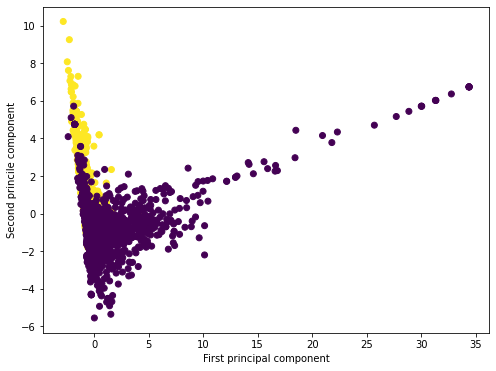

In [7]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(x_pca.shape,scaled_data.shape)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=Y)
plt.xlabel('First principal component')
plt.ylabel('Second princile component')

In [8]:
df = pd.DataFrame(x_pca, columns=['x1','x2'])
df['y'] = Y
distance = (df['x1'] - df['x2'])**2
df['x1_x2_rbf'] = np.exp(-(distance/100))
fig = px.scatter_3d(df,x="x1",y="x2",z="x1_x2_rbf",color="y")
fig.show()

In [9]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(x_pca.shape,scaled_data.shape)

df = pd.DataFrame(x_pca, columns=['x','y','z'])
df['k'] = Y
fig = px.scatter_3d(df,x="x",y="y",z="z",color="k")
fig.show()

(4601, 3) (4601, 54)


Linear

Min accuracy Linear Kernel : 0.6043478260869565
 Mean accuracy Linear Kernel : 0.6079119117230973
Max accuracy Linear Kernel : 0.6173913043478261
Cross Validation: 0.61 accuracy with a standard deviation of 0.00
Confusion Matrix on Test Dataset


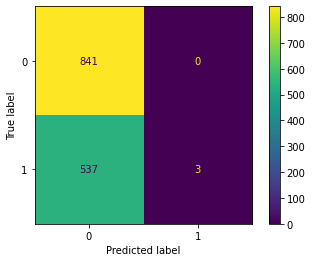

In [10]:
clf0 = svm.SVC(kernel="linear", C = 1.0)
scores_clf0 = cross_val_score(clf0, X, Y, cv = 10)
print ("Min accuracy Linear Kernel : " + str( scores_clf0 . min ()))
print (" Mean accuracy Linear Kernel : " + str( scores_clf0 . mean ()))
print ("Max accuracy Linear Kernel : " + str( scores_clf0 . max ()))
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores_clf0.mean(), scores_clf0.std()))
clf0.fit(X_train,Y_train)
print("Confusion Matrix on Test Dataset")
plot_confusion_matrix(clf0, X_test, Y_test)  
plt.show()

Ph

Min accuracy Linear Kernel : 0.7478260869565218
 Mean accuracy Linear Kernel : 0.8078756012449307
Max accuracy Linear Kernel : 0.8565217391304348
Cross Validation: 0.81 accuracy with a standard deviation of 0.03
Confusion Matrix on Test Dataset


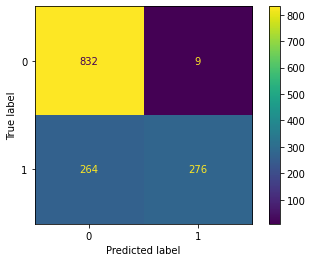

In [11]:
clf1 = svm.SVC(kernel="poly",degree=2, C = 1.0)
scores_clf1 = cross_val_score(clf1,X,Y,cv=10)
print ("Min accuracy Linear Kernel : " + str( scores_clf1 . min ()))
print (" Mean accuracy Linear Kernel : " + str( scores_clf1 . mean ()))
print ("Max accuracy Linear Kernel : " + str( scores_clf1 . max ()))
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores_clf1.mean(), scores_clf1.std()))
print("Confusion Matrix on Test Dataset")
clf1.fit(X_train,Y_train)
plot_confusion_matrix(clf1, X_test, Y_test)  
plt.show()

RBF

Min accuracy Linear Kernel : 0.8478260869565217
 Mean accuracy Linear Kernel : 0.9152324813731962
Max accuracy Linear Kernel : 0.9586956521739131
Cross Validation: 0.92 accuracy with a standard deviation of 0.03
Confusion Matrix on Test Dataset


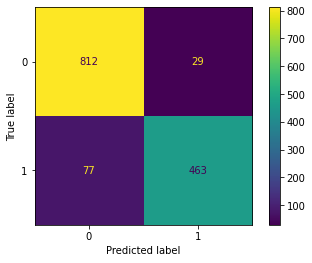

In [12]:
clf2 = svm.SVC(kernel="rbf", gamma='scale',C = 1)
scores_clf2 = cross_val_score(clf2,X,Y,cv=10)
print ("Min accuracy Linear Kernel : " + str( scores_clf2 . min ()))
print (" Mean accuracy Linear Kernel : " + str( scores_clf2 . mean ()))
print ("Max accuracy Linear Kernel : " + str( scores_clf2 . max ()))
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores_clf2.mean(), scores_clf2.std()))
print("Confusion Matrix on Test Dataset")
clf2.fit(X_train,Y_train)
plot_confusion_matrix(clf2, X_test, Y_test)  
plt.show()

Normalization

In [13]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)
newdata = np.where(normalized_X > 0.0, X / normalized_X, 0)

In [14]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(newdata, Y, test_size = 0.3, random_state = 1)

Linear

Min accuracy Linear Kernel : 0.6869565217391305
 Mean accuracy Linear Kernel : 0.7476728284447798
Max accuracy Linear Kernel : 0.7782608695652173
Cross Validation: 0.75 accuracy with a standard deviation of 0.03
Confusion Matrix on Test Dataset


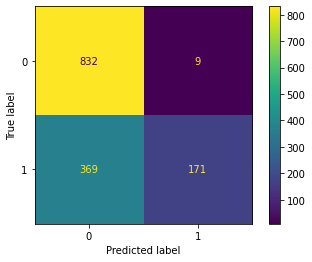

In [15]:
from sklearn import svm 
clf3 = svm.SVC(kernel="linear", C = 1)
scores_clf3 = cross_val_score(clf3,newdata,Y,cv=10)
print ("Min accuracy Linear Kernel : " + str( scores_clf3 . min ()))
print (" Mean accuracy Linear Kernel : " + str( scores_clf3 . mean ()))
print ("Max accuracy Linear Kernel : " + str( scores_clf3 . max ()))
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores_clf3.mean(), scores_clf3.std()))
print("Confusion Matrix on Test Dataset")
clf3.fit(X2_train,Y2_train)
plot_confusion_matrix(clf3, X2_test, Y2_test)  
plt.show()

Ph

Min accuracy Linear Kernel : 0.7527114967462039
 Mean accuracy Linear Kernel : 0.8191841931528814
Max accuracy Linear Kernel : 0.8826086956521739
Cross Validation: 0.82 accuracy with a standard deviation of 0.03
Confusion Matrix on Test Dataset


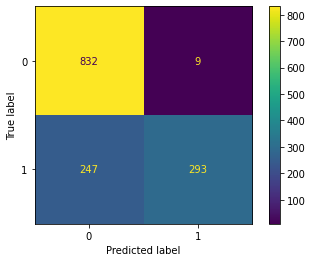

In [16]:
clf4 = svm.SVC(kernel="poly",degree=2, C = 1)
scores_clf4 = cross_val_score(clf4,newdata,Y,cv=10)
print ("Min accuracy Linear Kernel : " + str( scores_clf4 . min ()))
print (" Mean accuracy Linear Kernel : " + str( scores_clf4 . mean ()))
print ("Max accuracy Linear Kernel : " + str( scores_clf4 . max ()))
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores_clf4.mean(), scores_clf4.std()))
print("Confusion Matrix on Test Dataset")
clf4.fit(X2_train,Y2_train)
plot_confusion_matrix(clf4, X2_test, Y2_test)  
plt.show()

RBF

Min accuracy Linear Kernel : 0.8347826086956521
 Mean accuracy Linear Kernel : 0.9039323776289729
Max accuracy Linear Kernel : 0.9326086956521739
Cross Validation: 0.90 accuracy with a standard deviation of 0.03
Confusion Matrix on Test Dataset


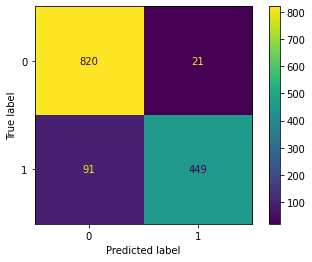

In [17]:
clf5 = svm.SVC(kernel="rbf", gamma='scale',C = 1)
scores_clf5 = cross_val_score(clf5,newdata,Y,cv=10)
print ("Min accuracy Linear Kernel : " + str( scores_clf5 . min ()))
print (" Mean accuracy Linear Kernel : " + str( scores_clf5 . mean ()))
print ("Max accuracy Linear Kernel : " + str( scores_clf5 . max ()))
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores_clf5.mean(), scores_clf5.std()))
print("Confusion Matrix on Test Dataset")
clf5.fit(X2_train,Y2_train)
plot_confusion_matrix(clf5, X2_test, Y2_test)  
plt.show()

Confusion Matrix Prot

KNN

In [19]:
from sklearn import neighbors
kNN = neighbors.KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train,Y_train)
sol = kNN.predict(X_test)
comparison = sol == Y_test.values
print("Accurency=",(len(comparison[comparison== True])/len(comparison))*100,"%")
scores = cross_val_score(kNN,X,Y,cv=10)
print(np.mean(scores))

Accurency= 92.39681390296887 %
0.9087112138074129


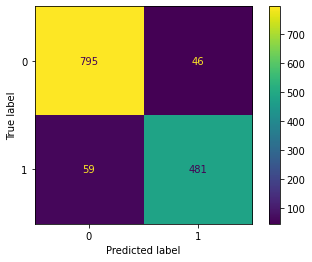

In [20]:
plot_confusion_matrix(kNN, X_test, Y_test)  
plt.show()

K-nearest neighbors  

In [21]:
from sklearn.base import BaseEstimator
class KNearesNeighbour(BaseEstimator):
    def __inti__(self):
        print("KNN Object Created")
        
    def fit(self,X,Y):
        self.__X_train = X
        self.__Y_train = Y
        
    def __euclideanDistance(self,v1,v2):
        #distanza euclidea tra due istanze cioè tra due vettori
        return np.sum(np.sqrt((v1-v2)**2))
    
    def __predictUtil(self,v):
        k = 5 
        #trainTemp copia del dataset
        trainTemp = self.__X_train.copy()
        distances= np.empty(shape=(len(trainTemp)))
        #è un array che contiene le distanze 
        trainTemp = np.array(trainTemp)
        #calcolo le distanza tra il vettore v in input e tutte le istanze del dataset
        for i in range(len(trainTemp)):
            d = self.__euclideanDistance(v,trainTemp[i])
            distances[i]= d
        
        trainTemp = pd.DataFrame(trainTemp)
        trainTemp['dist'] = distances
        trainTemp['class'] = self.__Y_train.values
        trainTemp=trainTemp.sort_values(by=['dist'])
        x = trainTemp[1:k+1]['class'].values
        
        #se nei vicini la classe dei vicini controllo se sono spam o no 
        if len(x[x==0]) >= len(x[x==1]):
            return 0 
        else: 
            return 1 
        
    def predict(self,x):
        x = np.array(x)
        solution = np.empty(shape=(len(x)))
        for i in range(len(x)): 
            solution[i] = self.__predictUtil(x[i])
        return solution
    
    def score(self, X,Y):
        s = self.predict(X)
        comparison = s == Y
        return (len(comparison[comparison== True])/len(comparison))
        


In [22]:
knn = KNearesNeighbour()
knn.fit(X_train,Y_train)
sol = knn.predict(X_test)
comparison = sol == Y_test.values
print("Accurency=",(len(comparison[comparison== True])/len(comparison))*100,"%")

Accurency= 90.51412020275163 %


In [23]:
scores = cross_val_score(knn,X,Y,cv=10)
print(np.mean(scores))

0.8770088654154484


Naive Bayes

In [24]:
from sklearn.base import BaseEstimator
class GaussianNaiveBayes(BaseEstimator): 
    def __init__(self):
        self.__trained = False 
        
    def __gaussianDistribution(self,x,k,mean,variance):
        temp = np.zeros(shape=(len(x)))
        for i in range(len(x)):
            temp[i] =  (1/math.sqrt(2*math.pi*variance[i])) * math.exp( (-1/(2*variance[i]))*((x[i]-mean[i])**2))
        return np.prod(temp)
    
    def fit(self,x,y):
        if len(x) != len(y) : 
            print("Error: X and Y have different size")
        else: 
            
            self.__classes = np.unique(y)
            
           
            u = x.copy()
            u['class'] = np.array(y.values)
            
            
            dataset_class=[]
            prob_class = []
            for c in self.__classes: 
                dataset_class.append(np.array(u[u['class']==c]))
                prob_class.append(len(dataset_class[c])/len(x))
            self.__prob = prob_class
            self.__dataset_class = dataset_class

           
            
            mean = np.zeros(shape=(2,54))
            variance = np.zeros(shape=(2,54))
           
            for c in self.__classes:   
                for i in range(0,len(x.columns)): 
                    mean[c][i] = st.mean(dataset_class[c][:,i])
                    variance[c][i] = (1/(len(dataset_class[c][:,i])-1))* sum((dataset_class[c][:,i]-mean[c][i])**2)
                    if variance[c][i] == 0:
                        variance[c][i] = 1
            self.__mean = mean
            self.__variance = variance 
            self.__trained = True 
            
    def __predict_util(self,x,k):
        numerator = (self.__gaussianDistribution(x,k,self.__mean[k],self.__variance[k])*self.__prob[k])
        denominator = 0
        for c in self.__classes:
            denominator += (self.__gaussianDistribution(x,c,self.__mean[c],self.__variance[c])*self.__prob[c])
        if denominator==0:
            denominator = 1
        return (numerator/denominator)
    
    
    def predict(self,x):
        if self.__trained == True:
            solutions = np.zeros(shape=(len(x),len(self.__classes)))
            x = np.array(x)
            for c in self.__classes:
                 for i in range(len(x)): 
                     solutions[i][c] = self.__predict_util(x[i],c)
            labels = np.zeros(shape=(len(solutions)))
            for i in range(len(solutions)):
                labels[i] = np.argmax(solutions[i])
            return labels
        else: 
            print("The model is not trained\n")
            return []
        
    def score(self, X,Y):
        s = self.predict(X)
        comparison = s == Y
        return (len(comparison[comparison== True])/len(comparison))
    

In [25]:
nbc = GaussianNaiveBayes()
nbc.fit(X_train,Y_train)
labels = nbc.predict(X_test)
comparison = labels == Y_test
scores = cross_val_score(nbc,X,Y,cv=10)
print ("Min accuracy Linear Kernel : " + str( scores . min ()))
print (" Mean accuracy Linear Kernel : " + str( scores . mean ()))
print ("Max accuracy Linear Kernel : " + str( scores . max ()))
print("Cross Validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores_clf5.mean(), scores_clf5.std()))
print("Accurency Test=",(len(comparison[comparison== True])/len(comparison)))
print("Accurency Cross Validation=",np.mean(scores))


Min accuracy Linear Kernel : 0.46956521739130436
 Mean accuracy Linear Kernel : 0.8108752239932094
Max accuracy Linear Kernel : 0.9739696312364425
Cross Validation: 0.90 accuracy with a standard deviation of 0.03
Accurency Test= 0.8110065170166546
Accurency Cross Validation= 0.8108752239932094


Implement Gaussian Naive Bayes with scikit-learn library 

In [26]:
#Test with scikit-learn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train,Y_train).predict(X_test)
comparison = y_pred == Y_test
scores = cross_val_score(gnb,X,Y,cv=10)
print("Accurency Test=",(len(comparison[comparison== True])/len(comparison)))
print("Accurency Cross Validation=",np.mean(scores))


Accurency Test= 0.8066618392469225
Accurency Cross Validation= 0.8150348957842122
